[source](https://www.kaggle.com/jeongjaenam/guide-kor-dg)
# 한글타닉 필사

## 진행 프로세스(목차)
1. 데이터 셋 확인
* 데이터가 어떻게 구성되어 있는지 확인합니다.
* 대부분의 캐글 데이터들은 잘 정제되어 있습니다.
  하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
  
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
* 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다.
  여러 시각화 툴을 사용하여 insight를 얻습니다.
  
3. 특성 공학 (Feature Engineering)
* 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.
  one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4. 모델 개발 및 학습
* sklearn, keras 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을
  사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 또 keras는 딥러닝 개발
  할 때 모델에 집중할 수 있도록 해줍니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을
  사용할 수 도 있습니다. 그리고 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다

5. 모델 예측 및 평가
* Train set 을 가지고 모델을 학습시킨 후, Test set 을 가지고 prediction 합니다.
  그리고 예측 성능이 원하는 수준인지 판단합니다.
  풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.

이러한 프로세스를 항상 염두에 두고 데이터 분석 및 모델링을 진행하는 것이 중요하다고 생각이 듭니다.

## 1. 모듈 임포트, 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
data_path = os.path.join(os.getcwd(), 'data')
os.listdir(data_path)

['.kaggle',
 'sample_submission.csv',
 'train.csv',
 'test.csv',
 '.ipynb_checkpoints',
 'kaggle.json']

In [7]:
train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test.csv')
sub_path = os.path.join(data_path, 'sample_submission.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_submit = pd.read_csv(sub_path)

In [8]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


타이타닉 데이터 Feature 설명
* survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
* pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - 성별
* Age - 나이(세)
* sibsp - 함께 탑승한 형제자매, 배우자 수 총합
* parch - 함께 탑승한 부모, 자녀 수 총합
* ticket - 티켓 넘버
* fare - 탑승 요금
* cabin - 객실 넘버
* bembarked - 탑승 항구

In [14]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 결측치 확인

In [18]:
# df_train.isnull().sum() / df_train.shape[0]
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# df_test.isnull().sum() / df_test.shape[0]
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 1.2 Target Label, Survied 확인

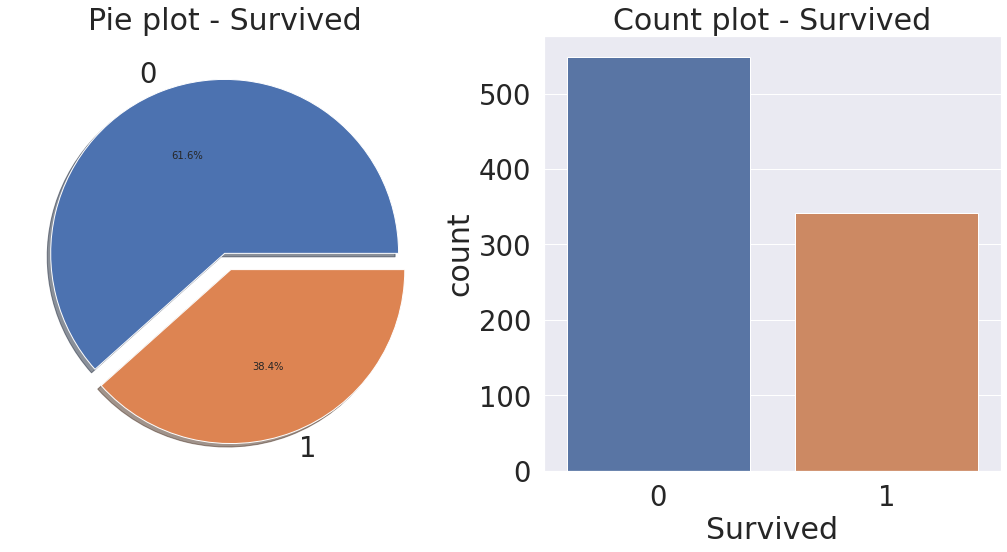

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label의 분포가 균일한 지 체크해보니 비교적 균일하게 나옵니다. label이 균일하지 않은 경우 metric에 문제가 생기게 됩니다. 이는 sensitivity, specificity, precision, recall 중 적절한 것을 고르면 커버가 되는 문제인 지 생각해보면 좋을 것 같습니다.

_균일하지 않은 데이터를 학습하는 것_

## 2.  탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

### 2.1 PClass
먼저 Pclass 에 대해서 살펴보겠습니다.

* Pclass는 서수형 데이터입니다.
  즉, 카테고리이면서 순서가 있는 데이터 타입입니다.
  먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.
  
* 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,
  pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다.
  또한 pivot 이라는 메소드도 있습니다.

* Pclass,Survived 를 가져온 후, pclass 로 묶습니다.
  그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,
  이를 평균내면 각 pclass 별 생존률이 나옵니다

* 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지
  확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)
  사람의 총합을 주게 됩니다

In [21]:
# pclass 그룹 별 데이터의 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# pclass 그룹 별 생손자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# crosstab을 통해 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
# mean을 통해 생존률을 구할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

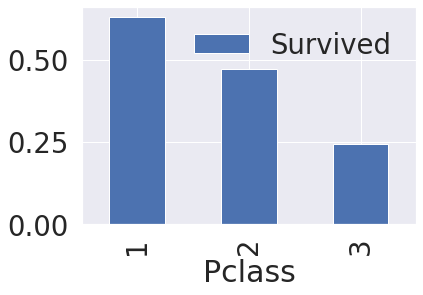

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

Pclass에 따라 평균 생존율이 변하는 것으로 봐서 아무래도 Pclass는 영향력이 큰 특성인 것 같습니다.

### 2.2 Sex

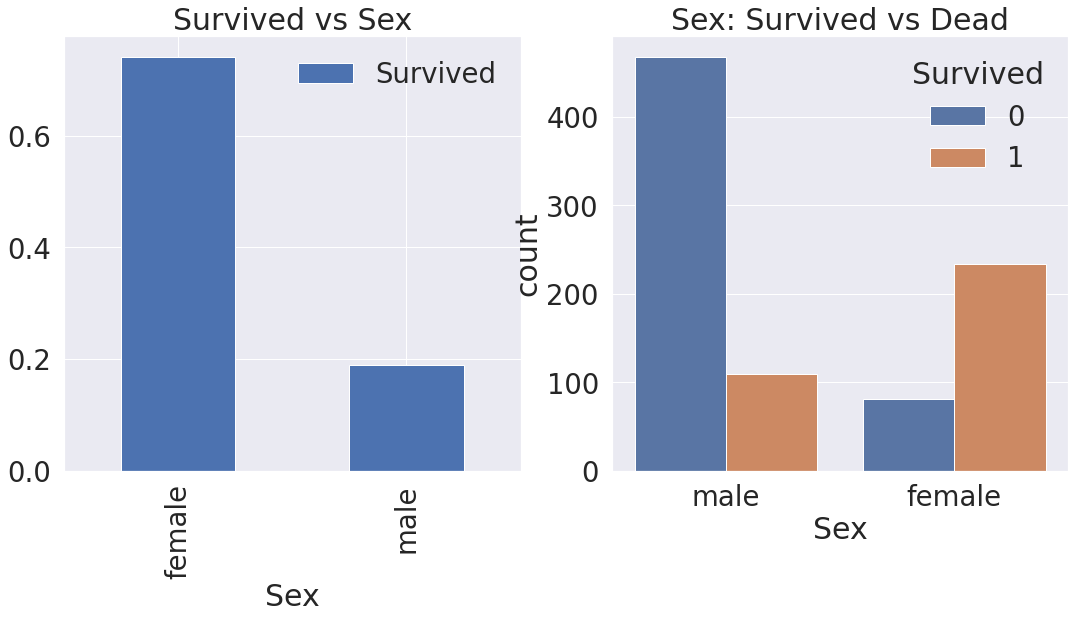

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

보다시피 여성의 생존률이 더 높은 것을 볼 수 있는데, 성별 또한 중요한 특성값임을 알 수 있습니다.

### 2.3 Both Sex and Pclass

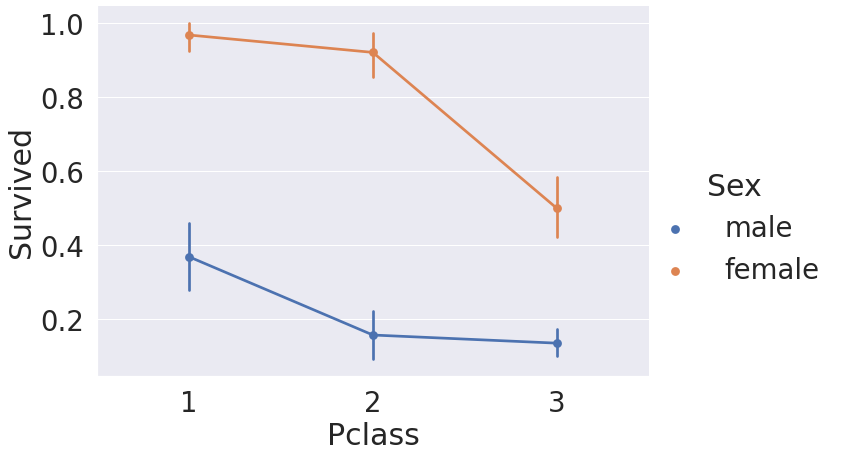

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
                size=6, aspect=1.5)

모든 클래스에서 여성이 살 확률이 남성보다 훨씬 높습니다.

### 2.4 Age

In [33]:
print(f"제일 나이 많은 탑승객 : {df_train['Age'].max():.1f} years old.")
print(f"제일 어린 탑승객 : {df_train['Age'].min():.1f} years old.")
print(f"탑승객 평균 나이 : {df_train['Age'].mean():.1f} years old.")

제일 나이 많은 탑승객 : 80.0 years old.
제일 어린 탑승객 : 0.4 years old.
탑승객 평균 나이 : 29.7 years old.


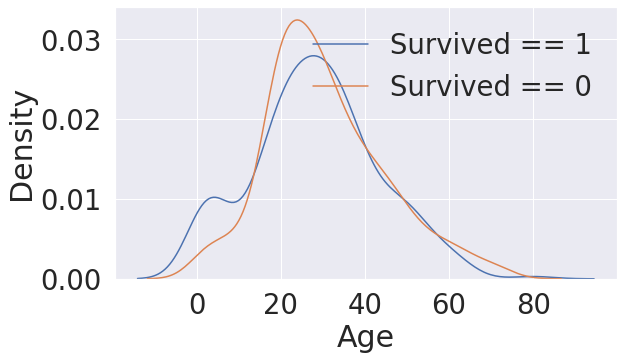

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

약 15세 미만 구간에서 생존률이 상대적으로 높은 것을 확인할 수 있습니다.

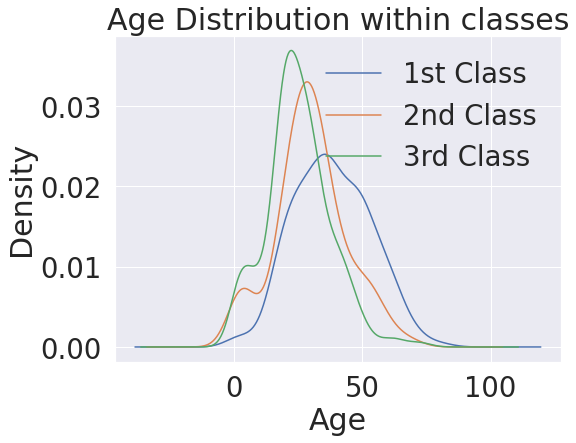

In [35]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클래스가 높아질수록, 나이 연령대가 높아지는 것을 확인할 수 있습니다.

나이대의 변화에 따른 생존확률을 알아보기 위해 누적 확률을 이용해 시각화 해보겠습니다.

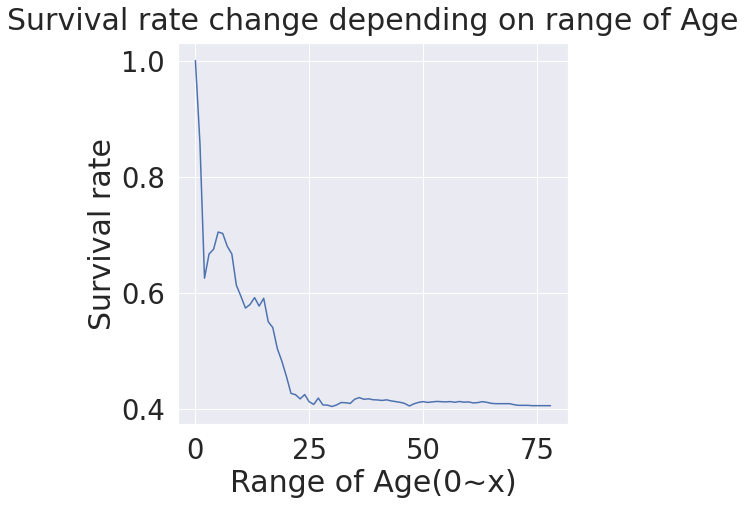

In [36]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()